In [2]:
#standard data manip
import pandas as pd
import numpy as np

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#visualizing
import matplotlib.pyplot as plt

First I want to take a look at the structure of the data and all the added cols

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Milestone2data/merged_clean_last.csv')
df

,Gender,Age in years at screening,Education level - Adults 20+,Total number of people in the Household,Difficulty these problems have caused,Difficulty with self-care,How often feel worried/nervous/anxious,Level of feeling worried/nervous/anxious,Covered by health insurance,Covered by private insurance,...,Covered by other government insurance,Time when no insurance in past year?,Routine place to go for healthcare,Type place most often go for healthcare,Past 12 months had video conf w/Dr?,Seen mental health professional/past yr,Monthly poverty index,Sleep hours - weekdays or workdays,Sleep hours - weekends,PHQ9_TOTAL
0,2.0,33.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,NaN,...,NaN,2.0,1.0,1.0,2.0,2.0,0.94,7.5,7.5,24.0
1,2.0,67.0,3.0,2.0,NaN,1.0,1.0,3.0,1.0,1.0,...,NaN,2.0,1.0,1.0,2.0,2.0,3.28,8.0,8.0,8.0
2,1.0,67.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,...,NaN,NaN,1.0,1.0,2.0,2.0,NaN,6.0,6.0,11.0
3,2.0,38.0,5.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,...,NaN,2.0,1.0,1.0,1.0,1.0,5.00,8.5,13.5,14.0
4,2.0,66.0,4.0,4.0,1.0,1.0,1.0,2.0,2.0,NaN,...,NaN,NaN,2.0,NaN,2.0,2.0,NaN,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2.0,62.0,4.0,2.0,1.0,1.0,5.0,NaN,1.0,NaN,...,NaN,2.0,1.0,1.0,2.0,1.0,1.09,7.5,7.5,12.0
463,1.0,19.0,NaN,3.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,2.0,2.0,NaN,1.0,2.0,NaN,8.5,6.5,16.0
464,1.0,51.0,4.0,5.0,1.0,1.0,4.0,3.0,1.0,1.0,...,NaN,2.0,1.0,1.0,2.0,2.0,4.80,7.5,8.5,8.0
465,1.0,61.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,...,NaN,1.0,2.0,NaN,2.0,2.0,5.00,5.0,5.0,22.0


In [4]:
df.isnull().sum()

,0
Gender,0
Age in years at screening,0
Education level - Adults 20+,26
Total number of people in the Household,0
Difficulty these problems have caused,71
Difficulty with self-care,0
How often feel worried/nervous/anxious,0
Level of feeling worried/nervous/anxious,19
Covered by health insurance,0
Covered by private insurance,267


There are large amounts of missing values in all of the DPQ data (depression screener)

I want to make a map now so that if we forget about what a column means we can quickly look it up

In [5]:
column_mapping = {
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DPQ010': 'Have little interest in doing things',
    'DPQ020': 'Feeling down, depressed, or hopeless',
    'DPQ030': 'Trouble sleeping or sleeping too much',
    'DPQ040': 'Feeling tired or having little energy',
    'DPQ050': 'Poor appetite or overeating',
    'DPQ060': ' Feeling bad about yourself',
    'DPQ070': 'Trouble concentrating on things',
    'DPQ080': 'Moving or speaking slowly or too fast',
    'DPQ090': 'Thought you would be better off dead',
    'DPQ100': 'Difficulty these problems have caused',
    'FNQ460': 'Difficulty remembering or concentrating',
    'FNQ470': 'Difficulty with self-care',
    'FNQ510': 'How often feel worried/nervous/anxious',
    'FNQ520': 'Level of feeling worried/nervous/anxious',
    'FNQ530': 'How often feel depressed',
    'FNQ540': 'Level of feeling depressed',
    'HUQ030': 'Routine place to go for healthcare',
    'HUQ042': 'Type place most often go for healthcare',
    'HUQ055': 'Past 12 months had video conf w/Dr?',
    'HUQ090': 'Seen mental health professional/past yr',
    'INDFMPIR': 'Ratio of family income to poverty',
    'PHQ9_SEVERITY': 'PHQ-9 Severity Level',
    'PHQ9_TOTAL': 'PHQ-9 Total Score',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDSTATR': 'Interview/Examination status',
    'SEQN': 'Respondent sequence number',
    'SLQ300': 'Usual sleep time on weekdays or workdays',
    'SLQ310': 'Usual wake time on weekdays or workdays',
    'SLQ320': 'Usual sleep time on weekends',
    'SLQ330': 'Usual wake time on weekends'
}


Now we can start with making a model that does PCA

In [13]:
from sklearn.impute import SimpleImputer

# Select only numeric columns. In this case they are all numeric
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Drop columns with all values missing (can't be imputed)
df_numeric_clean = df_numeric.dropna(axis=1, how='all')

# Impute missing values using the median
imputer = SimpleImputer(strategy='median')
df_imputed_array = imputer.fit_transform(df_numeric_clean)

# Rebuild DataFrame using only the columns that survived
df_imputed = pd.DataFrame(df_imputed_array, columns=df_numeric_clean.columns)

#standardize first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed_array)

#PCA model
# I want to retain at explain at least 95% of data variance
pca = PCA(n_components=.95)
pca_array = pca.fit_transform(df_scaled)

df_imputed

,Gender,Age in years at screening,Education level - Adults 20+,Total number of people in the Household,Difficulty these problems have caused,Difficulty with self-care,How often feel worried/nervous/anxious,Level of feeling worried/nervous/anxious,Covered by health insurance,Covered by private insurance,...,Covered by state-sponsored health plan,Time when no insurance in past year?,Routine place to go for healthcare,Type place most often go for healthcare,Past 12 months had video conf w/Dr?,Seen mental health professional/past yr,Monthly poverty index,Sleep hours - weekdays or workdays,Sleep hours - weekends,PHQ9_TOTAL
0,2.0,33.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,...,8.0,2.0,1.0,1.0,2.0,2.0,0.940,7.5,7.5,24.0
1,2.0,67.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,...,8.0,2.0,1.0,1.0,2.0,2.0,3.280,8.0,8.0,8.0
2,1.0,67.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,8.0,2.0,1.0,1.0,2.0,2.0,1.865,6.0,6.0,11.0
3,2.0,38.0,5.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,...,8.0,2.0,1.0,1.0,1.0,1.0,5.000,8.5,13.5,14.0
4,2.0,66.0,4.0,4.0,1.0,1.0,1.0,2.0,2.0,1.0,...,8.0,2.0,2.0,1.0,2.0,2.0,1.865,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2.0,62.0,4.0,2.0,1.0,1.0,5.0,3.0,1.0,1.0,...,8.0,2.0,1.0,1.0,2.0,1.0,1.090,7.5,7.5,12.0
463,1.0,19.0,4.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,...,8.0,2.0,2.0,1.0,1.0,2.0,1.865,8.5,6.5,16.0
464,1.0,51.0,4.0,5.0,1.0,1.0,4.0,3.0,1.0,1.0,...,8.0,2.0,1.0,1.0,2.0,2.0,4.800,7.5,8.5,8.0
465,1.0,61.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,...,8.0,1.0,2.0,1.0,2.0,2.0,5.000,5.0,5.0,22.0


We saw through some playing around that using a set amount of components for PCA is not good. So rather set the amount of variance we want explained and have the model find the components for us.


Now we want to interpret the number we got from the model and see what features are important.

In [14]:
print("Explained variance ratio by component:", pca.explained_variance_ratio_)
print("Total variance explained:", np.sum(pca.explained_variance_ratio_))

feature_names = df_imputed.columns
cols = [f'PC{i+1}' for i in range(pca.n_components_)]


pca_explanation_df = pd.DataFrame(
    pca.components_.T,                  # rows = features, cols = components
    index = feature_names,              # original feature names
    columns = cols                      # PC1 to PC20
)

#sort the df so that we can display the top 10 components
top_PC1 = pca_explanation_df['PC1'].abs().sort_values(ascending=False).head(20)
print("Features that explain 95% of the variance in the dataset:")
print(pca_explanation_df.loc[top_PC1.index, 'PC1'])

Explained variance ratio by component: [0.1176226  0.10173744 0.09704583 0.08830433 0.06970088 0.06229206
 0.05701463 0.05676899 0.05105709 0.04833108 0.04398627 0.04122145
 0.03529423 0.03221134 0.02934002 0.0266604 ]
Total variance explained: 0.9585886473135281
Features that explain 95% of the variance in the dataset:
Seen mental health professional/past yr     3.725419e-01
Difficulty these problems have caused      -3.406985e-01
Difficulty with self-care                  -3.400402e-01
PHQ9_TOTAL                                 -3.360561e-01
Routine place to go for healthcare          3.077398e-01
Past 12 months had video conf w/Dr?         2.754773e-01
Education level - Adults 20+                2.265233e-01
Sleep hours - weekdays or workdays         -2.218762e-01
Monthly poverty index                       2.189410e-01
Type place most often go for healthcare    -1.948517e-01
Age in years at screening                  -1.879714e-01
Covered by health insurance                 1.82320

Notes:


  still have to change data imp to use the census method we were talking about.



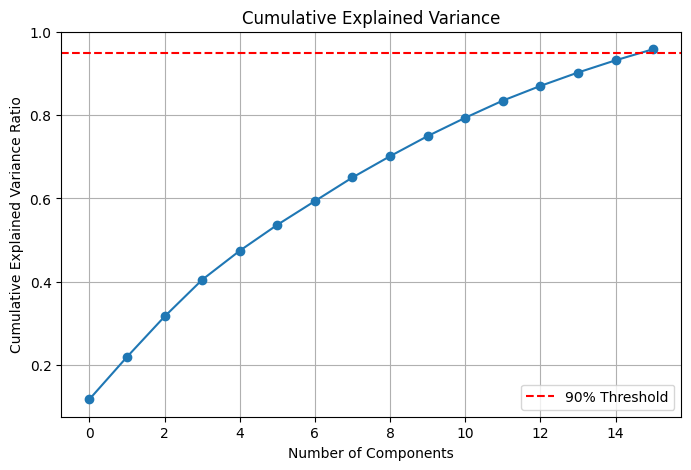

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='--', label='90% Threshold')
plt.grid(True)
plt.legend()
plt.show()

From this graph we see that 0 components explain 12% of the variance and that 12 components explain 95% of the variance
